In [678]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [679]:
df = pd.read_csv('../data/train.csv')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [680]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# Handel missing values

In [681]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<Axes: >

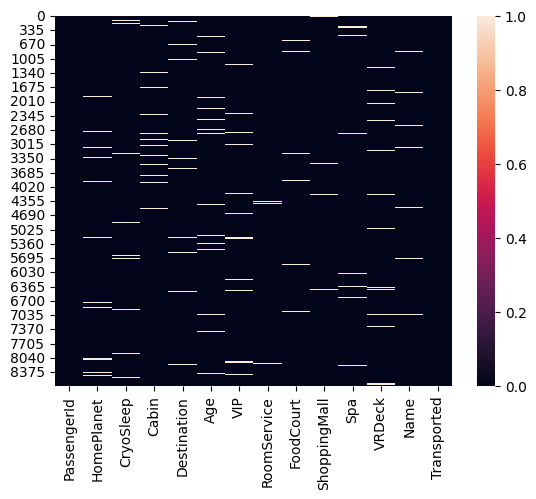

In [682]:
sns.heatmap(df.isna())

In [683]:
df['passenger_group'] = df['PassengerId'].str.split('_', n=1, expand=True)[0]
df['passenger_number_in_group'] = df['PassengerId'].str.split('_', n=1, expand=True)[1]

In [684]:
df['total_luxury_amenities'] = df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)

In [685]:
df['deck'] = df['Cabin'].str.split('/', n=2, expand=True)[0]
df['num'] = df['Cabin'].str.split('/', n=2, expand=True)[1]
df['side'] = df['Cabin'].str.split('/', n=2, expand=True)[2]

In [686]:
df['first name'] = df['Name'].str.split(' ', n=1, expand=True)[0]
df['last name'] = df['Name'].str.split(' ', n=1, expand=True)[1]

In [687]:
passenger_group_count = df['passenger_group'].value_counts().to_dict()


In [688]:
df['group_size'] = df['passenger_group'].map(passenger_group_count)

In [689]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,passenger_group,passenger_number_in_group,total_luxury_amenities,deck,num,side,first name,last name,group_size
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,False,0001,01,0.0,B,0,P,Maham,Ofracculy,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,True,0002,01,736.0,F,0,S,Juanna,Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,False,0003,01,10383.0,A,0,S,Altark,Susent,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,False,0003,02,5176.0,A,0,S,Solam,Susent,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,True,0004,01,1091.0,F,1,S,Willy,Santantines,1


# Home Planet

In [690]:
df.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [691]:
df.groupby(['passenger_group'] )['HomePlanet'].nunique().sort_values(ascending=False).reset_index(name='count')

,passenger_group,count
0,9280,1
1,0001,1
2,0002,1
3,0003,1
4,0004,1
...,...,...
6212,0303,0
6213,0242,0
6214,0251,0
6215,0210,0


In [692]:
grouped_home_planet=df.groupby(['passenger_group','HomePlanet'] )['HomePlanet'].nunique().sort_values(ascending=False).reset_index(name='count')
grouped_home_planet

,passenger_group,HomePlanet,count
0,9280,Europa,1
1,0001,Europa,1
2,0002,Earth,1
3,0003,Europa,1
4,0004,Earth,1
...,...,...,...
6102,0017,Earth,1
6103,0016,Mars,1
6104,0015,Earth,1
6105,0014,Mars,1


In [693]:
df = df.drop('HomePlanet', axis = 1)
df = df.merge(grouped_home_planet[['passenger_group', 'HomePlanet']], on='passenger_group', how='left')
df

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,passenger_group,passenger_number_in_group,total_luxury_amenities,deck,num,side,first name,last name,group_size,HomePlanet
0,0001_01,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,0001,01,0.0,B,0,P,Maham,Ofracculy,1,Europa
1,0002_01,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,0002,01,736.0,F,0,S,Juanna,Vines,1,Earth
2,0003_01,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,0003,01,10383.0,A,0,S,Altark,Susent,2,Europa
3,0003_02,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,0003,02,5176.0,A,0,S,Solam,Susent,2,Europa
4,0004_01,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,0004,01,1091.0,F,1,S,Willy,Santantines,1,Earth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,...,9276,01,8536.0,A,98,P,Gravior,Noxnuther,1,Europa
8689,9278_01,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,...,9278,01,0.0,G,1499,S,Kurta,Mondalley,1,Earth
8690,9279_01,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,...,9279,01,1873.0,G,1500,S,Fayey,Connon,1,Earth
8691,9280_01,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,...,9280,01,4637.0,E,608,S,Celeon,Hontichre,2,Europa


In [694]:
df.groupby(['deck'] )['HomePlanet'].nunique()

deck
A    1
B    1
C    1
D    2
E    3
F    2
G    1
T    1
Name: HomePlanet, dtype: int64

In [695]:
df['HomePlanet'] = np.where(df['HomePlanet'].isna() & df['deck'].isin(['A','B','C','T']), "Europa",df['HomePlanet'])
df['HomePlanet'] = np.where(df['HomePlanet'].isna(),np.where(df['deck']== 'G', "Earth",df['HomePlanet']),df['HomePlanet'])

In [696]:
df.isna().sum()

PassengerId                    0
CryoSleep                    217
Cabin                        199
Destination                  182
Age                          179
VIP                          203
RoomService                  181
FoodCourt                    183
ShoppingMall                 208
Spa                          183
VRDeck                       188
Name                         200
Transported                    0
passenger_group                0
passenger_number_in_group      0
total_luxury_amenities         0
deck                         199
num                          199
side                         199
first name                   200
last name                    200
group_size                     0
HomePlanet                    63
dtype: int64

In [697]:
home_planet_by_surname = df.groupby(['last name', 'HomePlanet'])['HomePlanet'].nunique().sort_values(ascending=False).reset_index(name='count')
home_planet_by_surname_dict=dict(zip(home_planet_by_surname['last name'], home_planet_by_surname['HomePlanet']))

In [698]:
df['HomePlanet'] = df['HomePlanet'].fillna(df['last name'].map(home_planet_by_surname_dict))

In [699]:
df.isna().sum()

PassengerId                    0
CryoSleep                    217
Cabin                        199
Destination                  182
Age                          179
VIP                          203
RoomService                  181
FoodCourt                    183
ShoppingMall                 208
Spa                          183
VRDeck                       188
Name                         200
Transported                    0
passenger_group                0
passenger_number_in_group      0
total_luxury_amenities         0
deck                         199
num                          199
side                         199
first name                   200
last name                    200
group_size                     0
HomePlanet                     8
dtype: int64

# Destination Planet

In [700]:
family_group_destination = df.groupby(['passenger_group', 'last name', 'Destination'])['Destination'].nunique().sort_values(ascending=False)

In [701]:
df.groupby(['num', 'Destination'])['Destination'].nunique().sort_values(ascending=False)

num   Destination  
999   TRAPPIST-1e      1
0     55 Cancri e      1
      PSO J318.5-22    1
      TRAPPIST-1e      1
1     55 Cancri e      1
                      ..
1004  55 Cancri e      1
1003  TRAPPIST-1e      1
      PSO J318.5-22    1
1002  TRAPPIST-1e      1
      PSO J318.5-22    1
Name: Destination, Length: 3198, dtype: int64

In [702]:
grouped_destination = df.groupby('passenger_group')['Destination'].nunique().sort_values(ascending=False).reset_index(name='count')
grouped_destination

,passenger_group,count
0,1211,3
1,0020,3
2,1624,3
3,8728,3
4,8862,3
...,...,...
6212,0645,0
6213,0576,0
6214,0462,0
6215,0382,0


In [703]:
one_destination_group=grouped_destination[grouped_destination['count'] == 1]
one_destination_group

,passenger_group,count
717,0002,1
718,0010,1
719,9254,1
720,9256,1
721,9257,1
...,...,...
6109,9270,1
6110,9268,1
6111,9267,1
6112,9264,1


In [704]:
df.isna().sum()

PassengerId                    0
CryoSleep                    217
Cabin                        199
Destination                  182
Age                          179
VIP                          203
RoomService                  181
FoodCourt                    183
ShoppingMall                 208
Spa                          183
VRDeck                       188
Name                         200
Transported                    0
passenger_group                0
passenger_number_in_group      0
total_luxury_amenities         0
deck                         199
num                          199
side                         199
first name                   200
last name                    200
group_size                     0
HomePlanet                     8
dtype: int64

# CryoSleep

In [705]:
no_cryo_sleep=df[df['CryoSleep'] == False]
no_cryo_sleep

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,passenger_group,passenger_number_in_group,total_luxury_amenities,deck,num,side,first name,last name,group_size,HomePlanet
0,0001_01,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,0001,01,0.0,B,0,P,Maham,Ofracculy,1,Europa
1,0002_01,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,0002,01,736.0,F,0,S,Juanna,Vines,1,Earth
2,0003_01,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,0003,01,10383.0,A,0,S,Altark,Susent,2,Europa
3,0003_02,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,0003,02,5176.0,A,0,S,Solam,Susent,2,Europa
4,0004_01,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,0004,01,1091.0,F,1,S,Willy,Santantines,1,Earth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8686,9275_02,False,A/97/P,TRAPPIST-1e,32.0,False,1.0,1146.0,0.0,50.0,...,9275,02,1231.0,A,97,P,Diram,Conable,3,Europa
8688,9276_01,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,...,9276,01,8536.0,A,98,P,Gravior,Noxnuther,1,Europa
8690,9279_01,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,...,9279,01,1873.0,G,1500,S,Fayey,Connon,1,Earth
8691,9280_01,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,...,9280,01,4637.0,E,608,S,Celeon,Hontichre,2,Europa


In [706]:
cryo_sleep=df[df['CryoSleep'] == True]

In [707]:
cryo_sleep.groupby('CryoSleep')[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
CryoSleep,,,,,
True,0.0,0.0,0.0,0.0,0.0


In [708]:
df['CryoSleep'] = np.where(df['CryoSleep'].isna(), np.where(df['total_luxury_amenities'] > 0, False, df['CryoSleep']), df['CryoSleep'])

In [709]:
df.isna().sum()

PassengerId                    0
CryoSleep                     98
Cabin                        199
Destination                  182
Age                          179
VIP                          203
RoomService                  181
FoodCourt                    183
ShoppingMall                 208
Spa                          183
VRDeck                       188
Name                         200
Transported                    0
passenger_group                0
passenger_number_in_group      0
total_luxury_amenities         0
deck                         199
num                          199
side                         199
first name                   200
last name                    200
group_size                     0
HomePlanet                     8
dtype: int64

# Luxury amenities

In [710]:
cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df.loc[(df['CryoSleep'] == True), cols] = 0

In [711]:
df.isna().sum()

PassengerId                    0
CryoSleep                     98
Cabin                        199
Destination                  182
Age                          179
VIP                          203
RoomService                  113
FoodCourt                    113
ShoppingMall                 112
Spa                          118
VRDeck                       126
Name                         200
Transported                    0
passenger_group                0
passenger_number_in_group      0
total_luxury_amenities         0
deck                         199
num                          199
side                         199
first name                   200
last name                    200
group_size                     0
HomePlanet                     8
dtype: int64

# Age

In [712]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [713]:
df.isna().sum()

PassengerId                    0
CryoSleep                     98
Cabin                        199
Destination                  182
Age                            0
VIP                          203
RoomService                  113
FoodCourt                    113
ShoppingMall                 112
Spa                          118
VRDeck                       126
Name                         200
Transported                    0
passenger_group                0
passenger_number_in_group      0
total_luxury_amenities         0
deck                         199
num                          199
side                         199
first name                   200
last name                    200
group_size                     0
HomePlanet                     8
dtype: int64

# VIP

In [714]:
df.groupby('deck')['VIP'].nunique().sort_values(ascending=False)

deck
A    2
B    2
C    2
D    2
E    2
F    2
G    1
T    1
Name: VIP, dtype: int64

In [715]:
df["VIP"] = np.where(df['VIP'].isna() & df['deck'].isin(['G', 'T']), False, df["VIP"] )

In [716]:
df.isna().sum()

PassengerId                    0
CryoSleep                     98
Cabin                        199
Destination                  182
Age                            0
VIP                          137
RoomService                  113
FoodCourt                    113
ShoppingMall                 112
Spa                          118
VRDeck                       126
Name                         200
Transported                    0
passenger_group                0
passenger_number_in_group      0
total_luxury_amenities         0
deck                         199
num                          199
side                         199
first name                   200
last name                    200
group_size                     0
HomePlanet                     8
dtype: int64

# Name

In [718]:
df['last name'].value_counts()

last name
Casonston     18
Oneiles       16
Domington     15
Litthews      15
Fulloydez     14
              ..
Maglible       1
Valing         1
Curry          1
Halexandez     1
Goods          1
Name: count, Length: 2217, dtype: int64

In [ ]:
df.head()

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,passenger_group,passenger_number_in_group,total_luxury_amenities,deck,num,side,first name,last name,group_size,HomePlanet
0,0001_01,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,0001,01,0.0,B,0,P,Maham,Ofracculy,1,Europa
1,0002_01,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,0002,01,736.0,F,0,S,Juanna,Vines,1,Earth
2,0003_01,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,0003,01,10383.0,A,0,S,Altark,Susent,2,Europa
3,0003_02,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,0003,02,5176.0,A,0,S,Solam,Susent,2,Europa
4,0004_01,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,0004,01,1091.0,F,1,S,Willy,Santantines,1,Earth


In [ ]:
df.isna().sum()

PassengerId                    0
CryoSleep                     98
Cabin                        199
Destination                  182
Age                            0
VIP                          137
RoomService                  113
FoodCourt                    113
ShoppingMall                 112
Spa                          118
VRDeck                       126
Name                         200
Transported                    0
passenger_group                0
passenger_number_in_group      0
total_luxury_amenities         0
deck                         199
num                          199
side                         199
first name                   200
last name                    200
group_size                     0
HomePlanet                     8
dtype: int64

In [ ]:
# HomePlanet 
df['HomePlanet'] = df['HomePlanet'].fillna(df['HomePlanet'].mode()[0])

# Destination 
df['Destination'] = df['Destination'].fillna(df['Destination'].mode()[0])


# CryoSleep 
df['CryoSleep'] = df['CryoSleep'].fillna(df['CryoSleep'].mode()[0]).astype(bool)

# VIP 
df['VIP'] = df['VIP'].fillna(False).astype(bool)

# RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
cols = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
df[cols] = df[cols].fillna(0).astype(float) 

# Cabin 
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])

# split Cabin
df['deck'] = df['Cabin'].str.split('/', n=2, expand=True)[0]
df['num']  = df['Cabin'].str.split('/', n=2, expand=True)[1]
df['side'] = df['Cabin'].str.split('/', n=2, expand=True)[2]




C:\Users\vikolosova\AppData\Local\Temp\ipykernel_52948\3827579671.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CryoSleep'] = df['CryoSleep'].fillna(df['CryoSleep'].mode()[0]).astype(bool)
C:\Users\vikolosova\AppData\Local\Temp\ipykernel_52948\3827579671.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['VIP'] = df['VIP'].fillna(False).astype(bool)


# Type

In [ ]:
df.dtypes

PassengerId                   object
CryoSleep                       bool
Cabin                         object
Destination                   object
Age                          float64
VIP                             bool
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
Name                          object
Transported                     bool
passenger_group               object
passenger_number_in_group     object
total_luxury_amenities       float64
deck                          object
num                           object
side                          object
first name                    object
last name                     object
group_size                     int64
HomePlanet                    object
dtype: object

In [ ]:
df.head(5)

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,passenger_group,passenger_number_in_group,total_luxury_amenities,deck,num,side,first name,last name,group_size,HomePlanet
0,0001_01,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,0001,01,0.0,B,0,P,Maham,Ofracculy,1,Europa
1,0002_01,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,0002,01,736.0,F,0,S,Juanna,Vines,1,Earth
2,0003_01,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,0003,01,10383.0,A,0,S,Altark,Susent,2,Europa
3,0003_02,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,0003,02,5176.0,A,0,S,Solam,Susent,2,Europa
4,0004_01,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,0004,01,1091.0,F,1,S,Willy,Santantines,1,Earth


In [ ]:
df[['passenger_group', 'passenger_number_in_group', 'Age', 'num']] = df[['passenger_group', 'passenger_number_in_group', 'Age', 'num']].astype(int)

In [ ]:
df[df.duplicated()]

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,passenger_group,passenger_number_in_group,total_luxury_amenities,deck,num,side,first name,last name,group_size,HomePlanet


In [ ]:
df.drop(columns = ['PassengerId', 'Cabin'], inplace=True )

In [ ]:
df.to_csv('../data/clean_data.csv', index=False)